In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


traindf=pd.read_csv("/Users/harshalghodmare/Desktop/train.csv")

In [87]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
import random as rnd
import seaborn as sns

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
traindf.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [92]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
traindf.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Danbom, Mr. Ernst Gilbert",male,347082,B96 B98,S
freq,1,577,7,4,644


In [94]:
traindf.describe(exclude=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
traindf[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [96]:
traindf[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [97]:
traindf[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [98]:
traindf[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


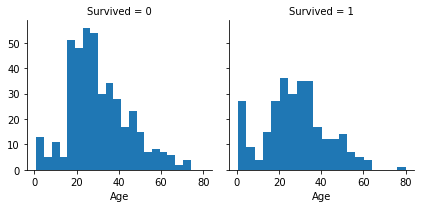

In [99]:
gr=sns.FacetGrid(traindf, col='Survived')
gr.map(plt.hist, 'Age',bins=20)

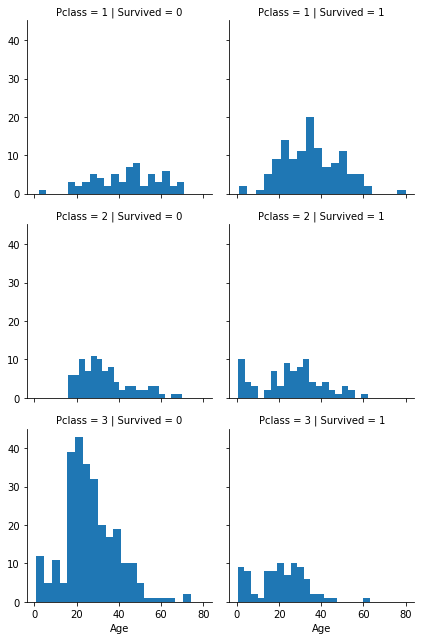

In [100]:
grid=sns.FacetGrid(traindf, col='Survived',row='Pclass')
grid.map(plt.hist, 'Age',bins=20)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


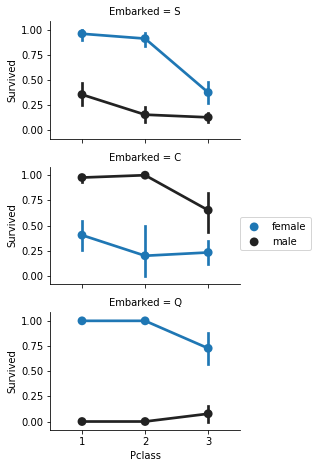

In [101]:
grid=sns.FacetGrid(traindf, row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palatte='deep')
grid.add_legend()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


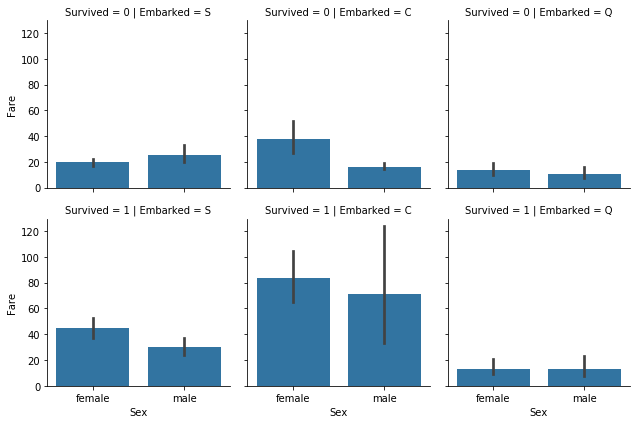

In [102]:
grid=sns.FacetGrid(traindf,row='Survived',col='Embarked')
grid.map(sns.barplot,'Sex','Fare')

In [103]:
testdf=pd.read_csv("/Users/harshalghodmare/Desktop/zzz/test.csv")

In [104]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
combine=[traindf,testdf]
print("Before", traindf.shape, testdf.shape, combine[0].shape, combine[1].shape)

traindf=traindf.drop(['Ticket','Cabin'], axis=1)
testdf=testdf.drop(['Ticket','Cabin'], axis=1)
combine=[traindf,testdf]

print("after", traindf.shape, testdf.shape, combine[0].shape, combine[1].shape)


Before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [106]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(traindf['Title'],traindf['Sex'])
                                              
                                              

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [107]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
traindf[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()  

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [108]:
title_mapping={"Mr":1, "Miss": 2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
traindf.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [109]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [110]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [111]:

combine = [traindf, testdf]
traindf.shape, testdf.shape

((891, 11), (418, 10))

In [112]:


traindf.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [113]:
guess_ages=np.zeros((2,3))


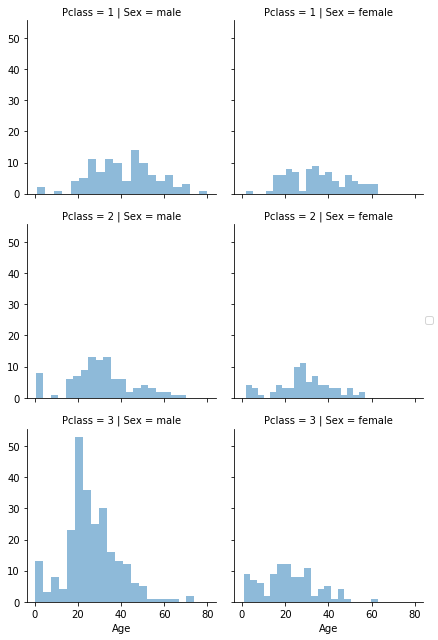

In [114]:
grid=sns.FacetGrid(traindf,row='Pclass',col='Sex')
grid.map(plt.hist,'Age', alpha=.5,bins=20)
grid.add_legend()

In [119]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


ValueError: cannot convert float NaN to integer

In [120]:
traindf['ageband']=pd.cut(traindf['Age'],5)
traindf[['ageband','Survived']].groupby(['ageband'], as_index=False).mean().sort_values(by='ageband',ascending=True)

,ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [121]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16) &  (dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32) &  (dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48) &  (dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']
traindf.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageband
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [122]:
traindf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageband
886,887,0,2,"Montvila, Rev. Juozas",male,1.0,0,0,13.00,S,5,"(16.336, 32.252]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,30.00,S,2,"(16.336, 32.252]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,2,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,30.00,C,1,"(16.336, 32.252]"
890,891,0,3,"Dooley, Mr. Patrick",male,1.0,0,0,7.75,Q,1,"(16.336, 32.252]"


In [123]:
traindf=traindf.drop(['ageband'],axis=1)
combine=[traindf,testdf]
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,S,1


In [124]:
for dataset in combine:
    dataset['familysize']=dataset['SibSp']+dataset['Parch']+1
    
traindf[['familysize','Survived']].groupby(['familysize'],as_index=False).mean().sort_values(by='Survived',ascending=False)    

,familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [125]:
for dataset in combine:
    dataset['isAlone']=0
    dataset.loc[dataset['familysize']==1 ,'isAlone']=1
    
traindf[['isAlone','Survived']].groupby(['isAlone'],as_index=False).mean()    

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [126]:
traindf=traindf.drop(['Parch','SibSp','familysize'],axis=1)
testdf=testdf.drop(['Parch','SibSp','familysize'],axis=1)
combine=[traindf,testdf]

traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,8.0500,S,1,1


In [127]:
for dataset in combine:
    dataset['age*class']=dataset.Age*dataset.Pclass
traindf.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,age*class
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,7.2500,S,1,0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,71.2833,C,3,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,7.9250,S,2,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,53.1000,S,3,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,8.0500,S,1,1,6.0


In [128]:
freqport=traindf.Embarked.dropna().mode()[0]

In [129]:
freqport

'S'

In [130]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freqport)
    
traindf[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()    

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [131]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
traindf.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,age*class
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,7.2500,0,1,0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,71.2833,1,3,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,7.9250,0,2,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,53.1000,0,3,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,8.0500,0,1,1,6.0


In [132]:
testdf['Fare'].fillna(testdf['Fare'].dropna().median(), inplace=True)
traindf['fareband']=pd.qcut(traindf['Fare'],4)

traindf[['fareband','Survived']].groupby(['fareband'],as_index=False).mean().sort_values(by='fareband',ascending=True)

,fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [133]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

traindf = traindf.drop(['fareband'], axis=1)
combine = [traindf, testdf]
    
traindf.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,age*class
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,0,0,1,0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,3,1,3,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,1,0,2,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,3,0,3,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,1,0,1,1,6.0
5,6,0,3,"Moran, Mr. James",male,NaN,1,2,1,1,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,3.0,3,0,1,1,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,2,0,4,0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1.0,1,0,3,0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,2,1,3,0,0.0


In [187]:
traindf=traindf.drop(['PassengerId','Name'],axis=1)


In [143]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,age*class
0,892,3,"Kelly, Mr. James",male,2.0,0,2,1,1,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,0,0,3,0,6.0
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,1,2,1,1,6.0
3,895,3,"Wirz, Mr. Albert",male,1.0,1,0,1,1,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,0,3,0,3.0


In [179]:
for dataset in combine:
    dataset.loc[dataset['Age'].isnull(),'Age']=4
    dataset.loc[dataset['age*class'].isnull(),'age*class']=dataset.Age*dataset.Pclass
traindf.tail()    


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,age*class
886,0,2,0,1.0,1,0,5,1,2.0
887,1,1,1,1.0,2,0,2,1,1.0
888,0,3,1,4.0,2,0,2,0,12.0
889,1,1,0,1.0,2,1,1,1,1.0
890,0,3,0,1.0,0,2,1,1,3.0


In [180]:
X_train = traindf.drop("Survived", axis=1)
Y_train = traindf["Survived"]
X_test  = testdf.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [182]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.1

In [184]:
submission = pd.DataFrame({
        "PassengerId": testdf["PassengerId"],
        "Survived": Y_pred
    })


In [185]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [186]:
submission.to_csv('/Users/harshalghodmare/Desktop/submission1.csv',index=False)